<a href="https://colab.research.google.com/github/VladislavTokarev02/AI_ML_homework/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [1]:
!pip install sympy

In [2]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
def f(x):
  return x**2 - 30*x + 1
def g(x):
  return -x**3 - 7*x**2 + 5*x +17
def h(x):
  return x**2 - 1/(x+1e-8) #исскуственно добавил для корректного отображения графика
def j(x):
  return 1/x**5 + x**17 + 8

In [4]:
x = sp.Symbol('x', real = True) #только на вещественных

In [5]:
def calc_extr(func):
    dfunc = sp.diff(func)
    solver = sp.solve(dfunc, x)
    d2func = sp.diff(dfunc)
    min_func = None
    max_func = None
    min_func_val = None
    max_func_val = None
    dct = {}
    for i in solver:
        d2func_val = d2func.subs(x, i)
        if d2func_val > 0:
            min_func = i
            min_func_val = func.subs(x, i)
            dct[min_func] = min_func_val
        elif d2func_val < 0:
            max_func = i
            max_func_val = func.subs(x, i)
            dct[max_func] = max_func_val
        else:
            print(f"В точке x = {i} ни максимум, ни минимум")

    return dct

In [6]:
f_x = calc_extr(f(x))
g_x = calc_extr(g(x))
h_x = calc_extr(h(x))
j_x = calc_extr(j(x))

## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [9]:
def calc_infl(func):
  dfunc = sp.diff(func)
  d2func = sp.diff(dfunc)
  solver = sp.solve(d2func)
  infl_dct = {}
  for i in solver:
    d2func_solv = i
    func_val = func.subs(x, i)
    infl_dct[d2func_solv] = func_val
  return infl_dct

In [10]:
f_x_infl = calc_infl(f(x))
g_x_infl = calc_infl(g(x))
h_x_infl = calc_infl(h(x))
j_x_infl = calc_infl(j(x))

На самом деле, в коде не доказано, что именно эти точки являются точками перегиба, поскольку важное условие - это смена знака значения функции при смещении вправо/влево на числовой прямой. В ручном подходе это отобразил

### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

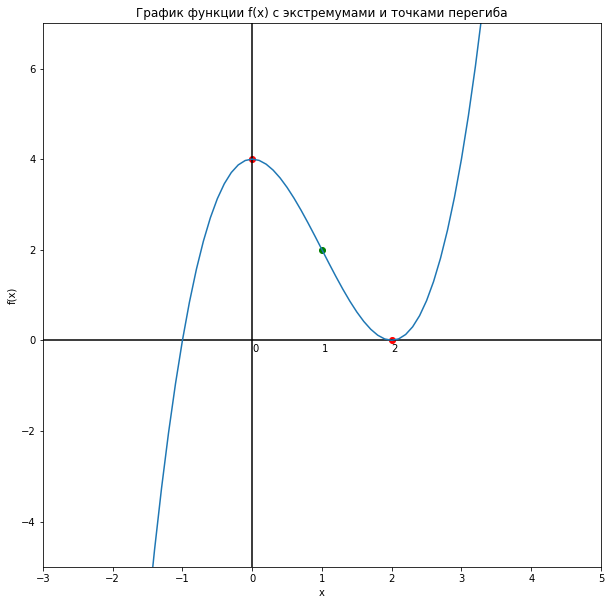

В данном случае показалось лучше изобразить координаты точки не на оси, а рядом с самой точкой.

точка минимума и ёё значение: 15, -224


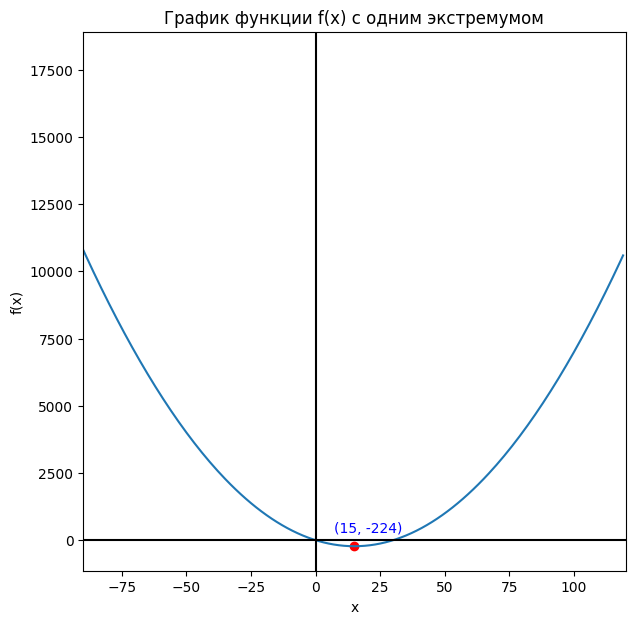

In [12]:
x_values = [x for x in np.arange(-120, 120, 1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize = (7, 7))
plt.plot(x_values, f_values)

plt.xlim([-90, 120])
#plt.ylim([-250, 100])
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.title('График функции f(x) c одним экстремумом')

x_min = list(f_x.keys())[0]
y_min = list(f_x.values())[0]
print(f"точка минимума и ёё значение: {x_min}, {y_min}")

plt.scatter(x_min, y_min, color = 'red')

# Подписываем точку - помог gpt
plt.annotate(f"({x_min}, {y_min})",  # Текст подписи
             (x_min, y_min),         # Координаты самой точки
             textcoords="offset points", # Используем смещение
             xytext=(10, 10),            # Смещение подписи (x, y) в пикселях
             ha="center",                # Выравнивание по горизонтали
             color="blue")                # Цвет текста

plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

{-5: -58, 1/3: 482/27}
точка минимума и ёё значение: -5, -58
точка максимума и ёё значение: 1/3, 482/27
{-7/3: -542/27}
-7/3
-542/27


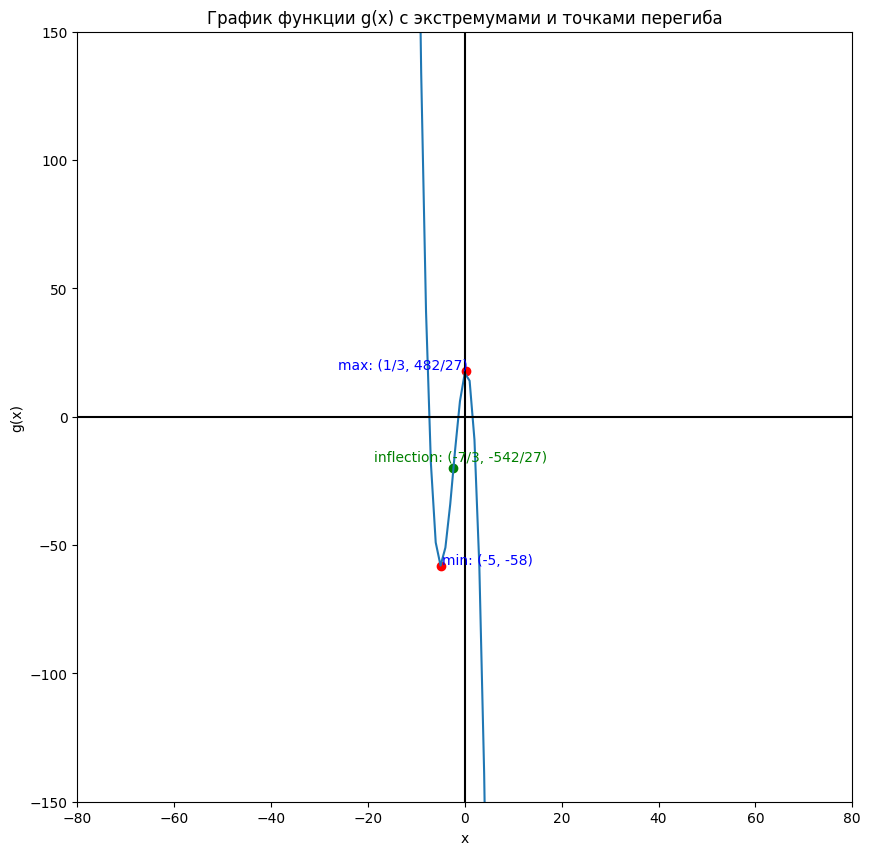

In [14]:
x_values = [x for x in np.arange(-120, 120, 1)]
g_values = [g(x) for x in x_values]

plt.figure(figsize = (10, 10))
plt.plot(x_values, g_values)

plt.xlim([-80, 80])
plt.ylim([-150, 150])
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.title('График функции g(x) c экстремумами и точками перегиба')

print(g_x)
x_min = list(g_x.keys())[0]
y_min = list(g_x.values())[0]
x_max = list(g_x.keys())[1]
y_max = list(g_x.values())[1]
print(f"точка минимума и ёё значение: {x_min}, {y_min}")
print(f"точка максимума и ёё значение: {x_max}, {y_max}")

plt.scatter(x_min, y_min, color = 'red')
plt.scatter(x_max, y_max, color = 'red')


#для минимума
plt.annotate(f"min: ({x_min}, {y_min})",  # Текст подписи
             (x_min, y_min),         # Координаты самой точки
             textcoords="offset points", # Используем смещение
             xytext=(1, 1),            # Смещение подписи (x, y)
             ha="left",                # Выравнивание по горизонтали
             color="blue")


#для максимума
plt.annotate(f"max: ({x_max}, {y_max})",  # Текст подписи
             (x_max, y_max),         # Координаты самой точки
             textcoords="offset points", # Используем смещение
             xytext=(1, 1),            # Смещение подписи (x, y)
             ha="right",                # Выравнивание по горизонтали
             color="blue")



print(g_x_infl)
x_infl = list(g_x_infl.keys())[0]
y_infl = list(g_x_infl.values())[0]
print(x_infl)
print(y_infl)

plt.scatter(x_infl, y_infl, color = 'green')

#для точки перегиба
plt.annotate(f"inflection: ({x_infl}, {y_infl})",
             (x_infl, y_infl),
            textcoords="offset points",
             xytext=(5, 5),
             ha="center",
             color = 'green')


plt.xlabel('x')
plt.ylabel('g(x)')

plt.show()

{-0.793700532650766: 1.88988159071632}
точка минимума и ёё значение: -0.794, 1.890
{0.999999990000000: -1.99999999894729e-8}
1
0


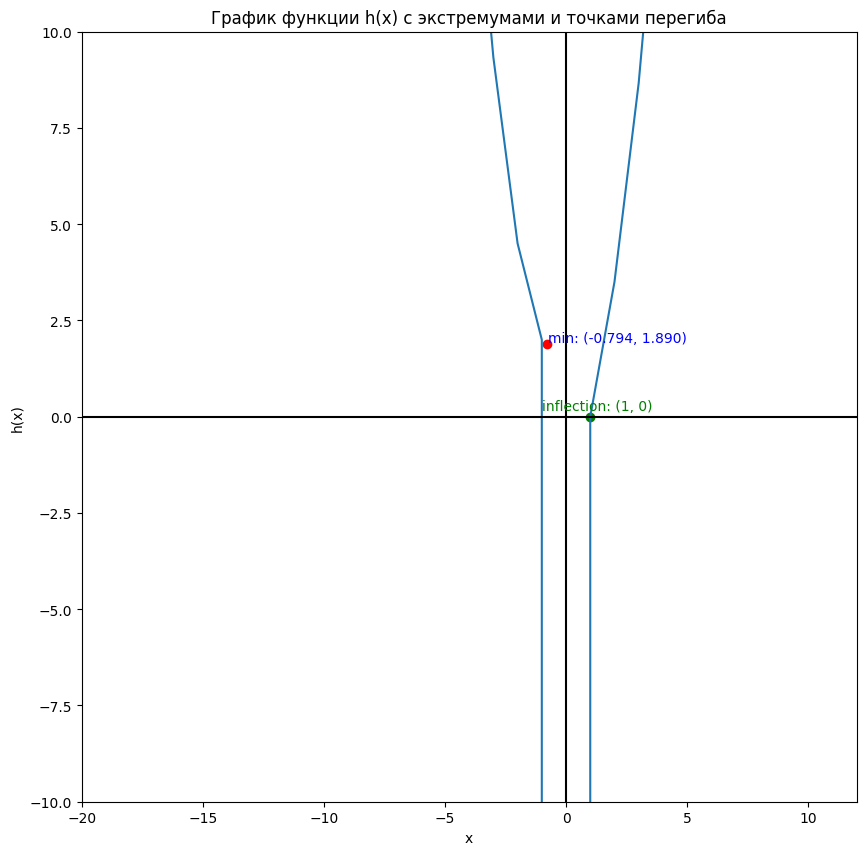

In [20]:
x_values = [x for x in np.arange(-300, 300, 1)]
h_values = [h(x) for x in x_values]

plt.figure(figsize = (10, 10))
plt.plot(x_values, h_values)

plt.xlim([-20, 12])
plt.ylim([-10, 10])
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.title('График функции h(x) c экстремумами и точками перегиба')

print(h_x)
x_min = round(list(h_x.keys())[0], 3)
y_min = round(list(h_x.values())[0], 3)
print(f"точка минимума и ёё значение: {x_min}, {y_min}")

plt.scatter(x_min, y_min, color = 'red')


#для минимума
plt.annotate(f"min: ({x_min}, {y_min})",  # Текст подписи
             (x_min, y_min),         # Координаты самой точки
             textcoords="offset points", # Используем смещение
             xytext=(1, 1),            # Смещение подписи (x, y)
             ha="left",                # Выравнивание по горизонтали
             color="blue")



print(h_x_infl)
x_infl = round(list(h_x_infl.keys())[0])
y_infl = round(list(h_x_infl.values())[0])
print(x_infl)
print(y_infl)

plt.scatter(x_infl, y_infl, color = 'green')

#для точки перегиба
plt.annotate(f"inflection: ({x_infl}, {y_infl})",
             (x_infl, y_infl),
            textcoords="offset points",
             xytext=(5, 5),
             ha="center",
             color = 'green')


plt.xlabel('x')
plt.ylabel('h(x)')

plt.show()

<ipython-input-21-c8516d331610>:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/x**5 + x**17 + 8


{-0.793700532650766: 1.88988159071632}
точка минимума и ёё значение: -17**(21/22)*5**(1/22)/17, -22*17**(5/22)*5**(17/22)/85 + 8
{-543361077710752838169347099197440**(1/22)*sin(pi/22)*sin(pi/11)/34 + 543361077710752838169347099197440**(1/22)*cos(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/11)*cos(pi/22)/34: 8 + (-543361077710752838169347099197440**(1/22)*sin(pi/22)*sin(pi/11)/34 + 543361077710752838169347099197440**(1/22)*cos(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/11)*cos(pi/22)/34)**(-5) + (-543361077710752838169347099197440**(1/22)*sin(pi/22)*sin(pi/11)/34 + 543361077710752838169347099197440**(1/22)*cos(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/11)*cos(pi/22)/34)**17, 54336107771

TypeError: Cannot convert complex to float

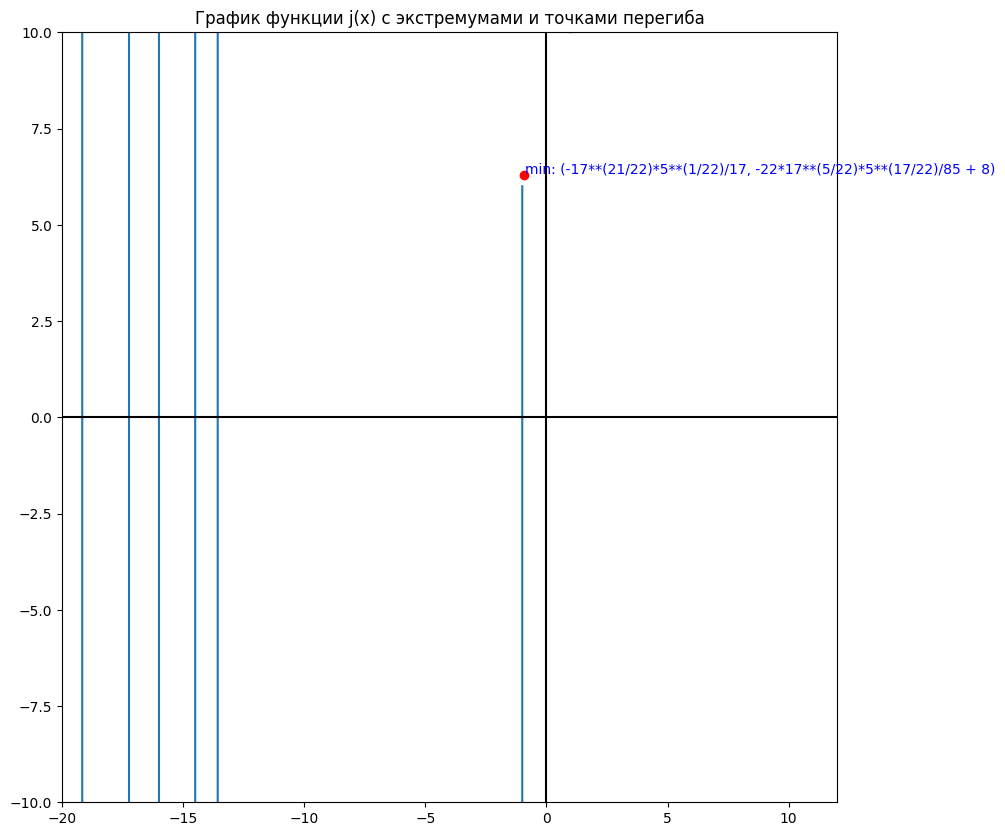

In [23]:
x_values = [x for x in np.arange(-300, 300, 1)]
j_values = [j(x) for x in x_values]

plt.figure(figsize = (10, 10))
plt.plot(x_values, j_values)

plt.xlim([-20, 12])
plt.ylim([-10, 10])
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.title('График функции j(x) c экстремумами и точками перегиба')

print(h_x)
x_min = list(j_x.keys())[0]
y_min = list(j_x.values())[0]
print(f"точка минимума и ёё значение: {x_min}, {y_min}")

plt.scatter(x_min, y_min, color = 'red')


#для минимума
plt.annotate(f"min: ({x_min}, {y_min})",  # Текст подписи
             (x_min, y_min),         # Координаты самой точки
             textcoords="offset points", # Используем смещение
             xytext=(1, 1),            # Смещение подписи (x, y)
             ha="left",                # Выравнивание по горизонтали
             color="blue")



print(j_x_infl)
x_infl = list(j_x_infl.keys())[0]
y_infl = list(j_x_infl.values())[0]
print(x_infl)
print(y_infl)

plt.scatter(x_infl, y_infl, color = 'green')

#для точки перегиба
plt.annotate(f"inflection: ({x_infl}, {y_infl})",
             (x_infl, y_infl),
            textcoords="offset points",
             xytext=(5, 5),
             ha="center",
             color = 'green')


plt.xlabel('x')
plt.ylabel('j(x)')

plt.show()

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [ ]:
# your code here

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [ ]:
# your code here

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [ ]:
# your code here

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [ ]:
# your code here

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [ ]:
# your code here

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
# your code here

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [ ]:
# your code here

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)